#Distribución t-student
Diego Rosas A01634154

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [35]:
# Creamos un DataFrame con todos los datos:

datos_jugo_a = [20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23]
datos_jugo_b = [19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18]
df = pd.DataFrame({'Jugo A': datos_jugo_a, 'Jugo B': datos_jugo_b})

# Estandarizamos el DataFrame de Jugos A y B completo:
df_estandarizado = (df - np.mean(df.values)) / np.std(df.values)

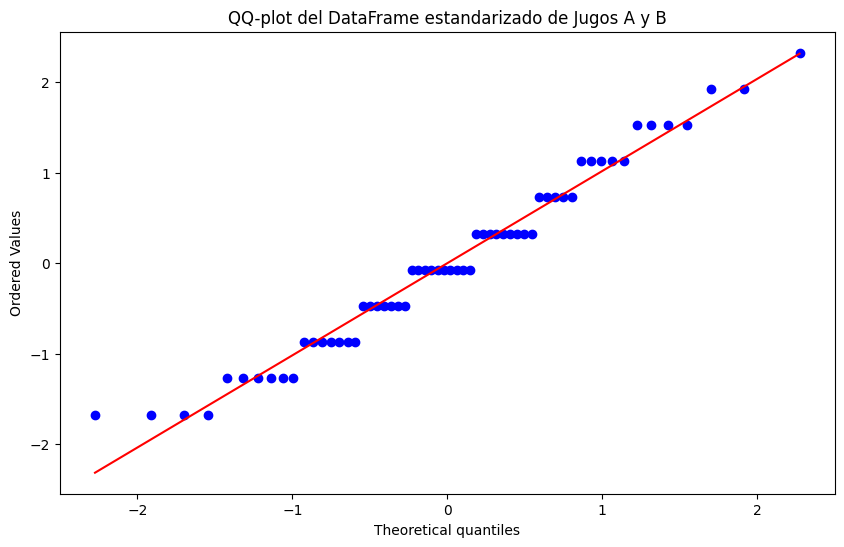

In [36]:
# Realizamos el QQ-plot para el DataFrame estandarizado de Jugos A y B:
plt.figure(figsize=(10, 6))
stats.probplot(df_estandarizado.values.flatten(), dist="norm", plot=plt)
plt.title("QQ-plot del DataFrame estandarizado de Jugos A y B")
plt.show()

In [37]:
# Realizamos el test de Kolmogorov para el DataFrame completo estandarizado:
kolmogorov_test = stats.kstest(df_estandarizado.values.flatten(), 'norm')

print("Test de Kolmogorov-Smirnov para el DataFrame estandarizado de Jugos A y B:", kolmogorov_test)

Test de Kolmogorov-Smirnov para el DataFrame estandarizado de Jugos A y B: KstestResult(statistic=0.0958968816029993, pvalue=0.6050408185687179, statistic_location=-0.07333496301728606, statistic_sign=1)


In [38]:
#Debido a que los datos no son normales, utilizamos distriución t-student y calculamos el intervalo de confianza poblacional:

nivel_confianza = 0.99
alpha = 1 - nivel_confianza

media_poblacional = np.mean(df_estandarizado.values)
desv_est_poblacional= np.std(df_estandarizado.values)
num_datos_totales = df_estandarizado.size

valor_critico = stats.t.ppf(1 - alpha / 2, num_datos_totales - 1)

margen_error_poblacional = valor_critico * desv_est_poblacional/ np.sqrt(num_datos_totales)
intervalo_poblacional = (media_poblacional - margen_error_poblacional, media_poblacional + margen_error_poblacional)

print(f"Intervalo de confianza del {nivel_confianza * 100}% para el DataFrame estandarizado de Jugos A y B:", intervalo_poblacional)

Intervalo de confianza del 99.0% para el DataFrame estandarizado de Jugos A y B: (-0.3436315774640739, 0.3436315774640737)


In [39]:
#Ahora obtenemos el intervalo utilizando el DataFrame original (sin estandarizar):

media_poblacional = np.mean(df.values)
desv_est_poblacional= np.std(df.values)
num_datos_totales = df.size

valor_critico = stats.t.ppf(1 - alpha / 2, num_datos_totales - 1)

margen_error_poblacional = valor_critico * desv_est_poblacional/ np.sqrt(num_datos_totales)
intervalo_poblacional = (media_poblacional - margen_error_poblacional, media_poblacional + margen_error_poblacional)
print(f"Intervalo de confianza del {nivel_confianza * 100}% para el DataFrame estandarizado de Jugos A y B:", intervalo_poblacional)

Intervalo de confianza del 99.0% para el DataFrame estandarizado de Jugos A y B: (21.324273480528465, 23.042393186138202)
